# FER

In [34]:
#!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch
import torch.nn as nn
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

def read_kaggle_fer_dataset(name, subfolder="", provider="tensorflow"):
    """
    Read a Kaggle dataset into a pandas DataFrame.

    Parameters:
    - name: str, the name of the Kaggle dataset (e.g., 'zillow/zecon')
    - subfolder: str, optional, the subfolder within the dataset to read from
    - provider: str, optional, the provider to use for reading the dataset (default is 'tensorflow')

    Returns:
    - 
    """
    #file_path = kagglehub.dataset_download("mname")
    # Use kagglehub to download and read the dataset
    data_path = kagglehub.dataset_download(name)
    print(f"Dataset downloaded to: {data_path}")
    list_folders = os.listdir(data_path)
    print(f"Available folders: {list_folders}")

    # Tensorflow dataset
    if provider == "tensorflow":
        dataset = tf.data.Dataset.from_tensor_slices(data_path+subfolder)
    # Pytorch dataset
    elif provider == "pytorch":
        dataset = torch.utils.data.TensorDataset(data_path+subfolder)
    else:
        raise ValueError("Unsupported provider. Use 'tensorflow' or 'pytorch'.")
    
    return data_path, dataset

file_path = "/Users/sofiafernandes/.cache/kagglehub/datasets/msambare/fer2013/versions/1"
print("Subfolders:", os.listdir(file_path))
#file_path, df = read_kaggle_fer_dataset("msambre/fer2013", subfolder="/versions/1", provider="tensorflow")


# data augmentation by flipping, rotating and changing colors
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = data_gen.flow_from_directory(
    file_path+"/train",
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=128,
    class_mode="categorical",
    subset="training"
)

test_data = data_gen.flow_from_directory(
    file_path+"/test",
    target_size=(48, 48),
    color_mode="rgb", #"grayscale",
    batch_size=128,
    class_mode="categorical",
    subset="validation"
)







Subfolders: ['test', 'train']
Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [35]:
os.listdir(file_path+"/train")

['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']

Epoch 1/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2703 - auc_9: 0.6669 - loss: 1.8229

180/180 ━━━━━━━━━━━━━━━━━━━━ 809s 4s/step - accuracy: 0.2707 - auc_9: 0.6673 - loss: 1.8220 - val_accuracy: 0.4888 - val_auc_9: 0.8352 - val_loss: 1.3754
Epoch 2/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4579 - auc_9: 0.8198 - loss: 1.4260

180/180 ━━━━━━━━━━━━━━━━━━━━ 861s 5s/step - accuracy: 0.4580 - auc_9: 0.8199 - loss: 1.4258 - val_accuracy: 0.5203 - val_auc_9: 0.8607 - val_loss: 1.2704
Epoch 3/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5202 - auc_9: 0.8571 - loss: 1.2869

180/180 ━━━━━━━━━━━━━━━━━━━━ 831s 5s/step - accuracy: 0.5203 - auc_9: 0.8572 - loss: 1.2869 - val_accuracy: 0.5468 - val_auc_9: 0.8737 - val_loss: 1.2173
Epoch 4/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5503 - auc_9: 0.8736 - loss: 1.2177

180/180 ━━━━━━━━━━━━━━━━━━━━ 1002s 6s/step - accuracy: 0.5503 - auc_9: 0.8736 - loss: 1.2177 - val_accuracy: 0.5824 - val_auc_9: 0.8932 - val_loss: 1.1255
Epoch 5/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5644 - auc_9: 0.8849 - loss: 1.1638

180/180 ━━━━━━━━━━━━━━━━━━━━ 1028s 6s/step - accuracy: 0.5645 - auc_9: 0.8849 - loss: 1.1638 - val_accuracy: 0.5796 - val_auc_9: 0.8941 - val_loss: 1.1211


12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 931ms/step - accuracy: 0.5961 - auc_9: 0.9015 - loss: 1.0854
Test Loss: 1.1157
Test Accuracy: 0.5908
Test AUC: 0.8953


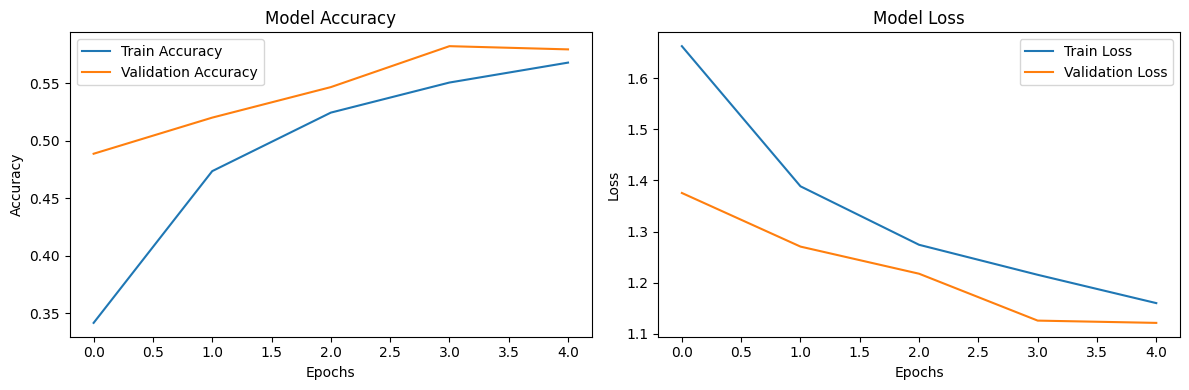

12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 949ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.08      0.10       191
           1       0.00      0.00      0.00        22
           2       0.18      0.06      0.09       204
           3       0.26      0.34      0.29       354
           4       0.15      0.13      0.14       246
           5       0.18      0.25      0.21       249
           6       0.16      0.19      0.18       166

    accuracy                           0.19      1432
   macro avg       0.15      0.15      0.14      1432
weighted avg       0.18      0.19      0.18      1432



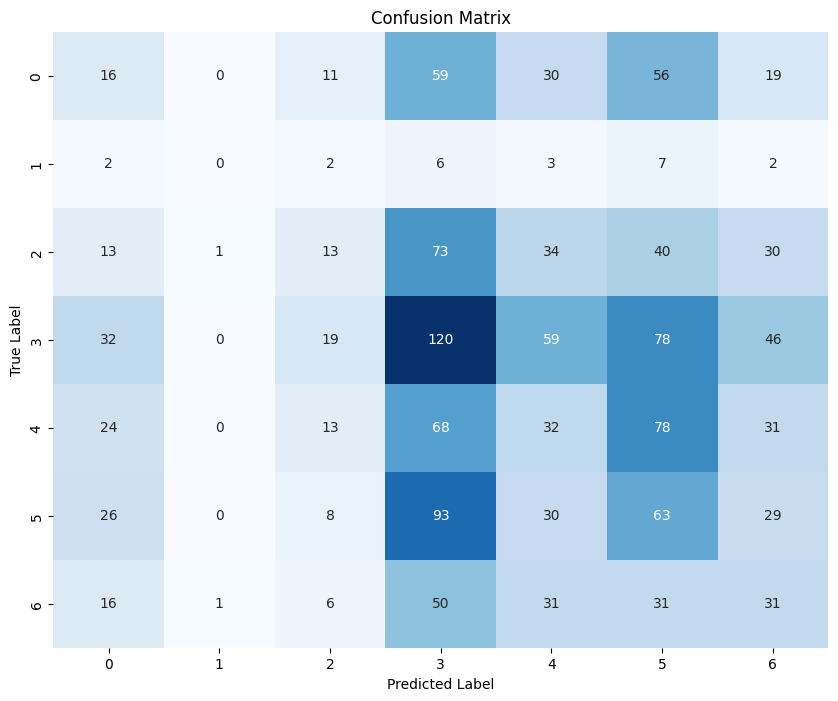

OSError: [Errno 28] Can't synchronously write data (file write failed: time = Mon Apr  7 04:20:06 2025
, filename = 'fer2013_model_vgg.h5', file descriptor = 81, errno = 28, error message = 'No space left on device', buf = 0x7ff1fb3a7000, total write size = 9437184, bytes this sub-write = 9437184, offset = 21701864)

In [ ]:
#!pip install opencv-python
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.metrics import AUC



# Build model
base_model = VGG16(
    include_top=False,
    input_shape=(48, 48, 3),  # Now expects 3-channel input
    weights='imagenet'
)
base_model.trainable = True

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy', AUC()])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Train
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=5,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluation
best_model = tf.keras.models.load_model('best_model.h5')
loss, accuracy, auc = best_model.evaluate(test_data)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Classification report
test_data.reset()  # Important for correct order
predictions = best_model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_data.classes

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [54]:
best_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,817 (56.64 MB)

 Trainable params: 14,847,815 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


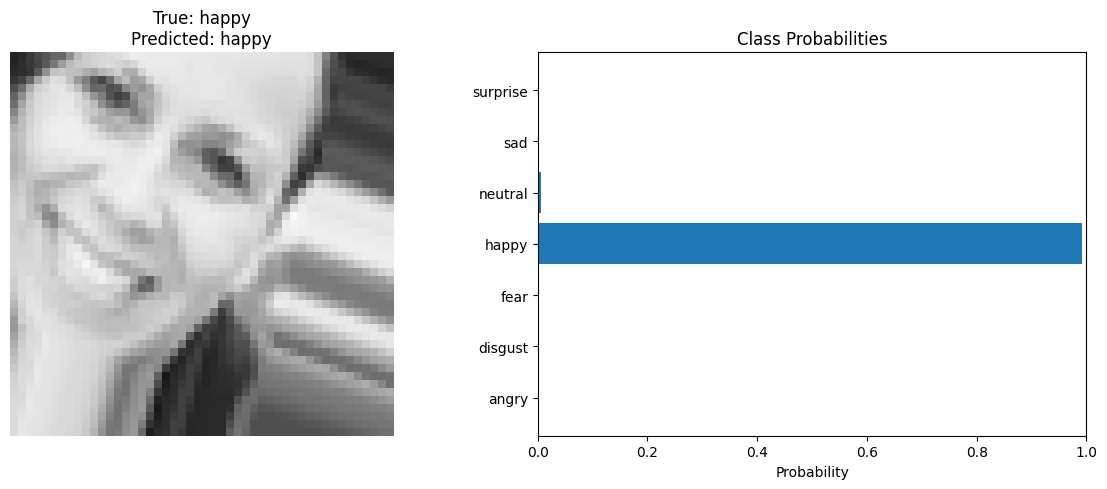

Confidence: 99.26%

True class: happy
Predicted class: happy


In [53]:
# Get class names from your data generator
class_names = list(train_data.class_indices.keys())

# Reset generator and get a batch
test_data.reset()
x_batch, y_batch = next(test_data)  # Changed to use next()

# Select the first sample from the batch
sample_image = x_batch[1]
sample_label = y_batch[1]

# Make prediction
prediction = best_model.predict(np.expand_dims(sample_image, axis=0))
predicted_class = np.argmax(prediction)
true_class = np.argmax(sample_label)

# Create visualization
plt.figure(figsize=(12, 5))

# Plot image
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title(f"True: {class_names[true_class]}\nPredicted: {class_names[predicted_class]}")
plt.axis('off')

# Plot probability distribution
plt.subplot(1, 2, 2)
plt.barh(class_names, prediction[0])
plt.title("Class Probabilities")
plt.xlabel("Probability")
plt.xlim([0, 1])

plt.tight_layout()
plt.show()

# Print confidence score
print(f"Confidence: {np.max(prediction):.2%}")
print(f"\nTrue class: {class_names[true_class]}")
print(f"Predicted class: {class_names[predicted_class]}")

In [ ]:
# save model
model.save("fer_model_vgg.h5")


OSError: [Errno 28] Can't close file (file write failed: time = Mon Apr  7 04:20:53 2025
, filename = 'fer_model_vgg.h5', file descriptor = 81, errno = 28, error message = 'No space left on device', buf = 0x7ff1f0b51000, total write size = 35568, bytes this sub-write = 35568, offset = 2048)

In [49]:
# Assuming you have a val_generator
#sample_batch = test_data.next()
single_image = test_data[0]  # Get the first image from the first batch
single_label = test_data[1]  # Get the corresponding label (if needed for verification)
print(single_image, single_label)
# put the image with 3 channels
img_array = single_image.reshape((1, 48, 48, 3))  # Reshape to (1, height, width, channels)


# Make prediction
predicted_class = model.predict(img_array)
predicted_class = np.argmax(predicted_class, axis=1)

# Display the image and prediction
plt.imshow(single_image)
plt.axis('off')
print(f"Predicted class: {predicted_class[0]}")



(array([[[[0.7803922 , 0.7803922 , 0.7803922 ],
         [0.7803922 , 0.7803922 , 0.7803922 ],
         [0.77978027, 0.77978027, 0.77978027],
         ...,
         [0.37370867, 0.37370867, 0.37370867],
         [0.38778153, 0.38778153, 0.38778153],
         [0.39506927, 0.39506927, 0.39506927]],

        [[0.7778545 , 0.7778545 , 0.7778545 ],
         [0.77920395, 0.77920395, 0.77920395],
         [0.7803922 , 0.7803922 , 0.7803922 ],
         ...,
         [0.3788769 , 0.3788769 , 0.3788769 ],
         [0.3855666 , 0.3855666 , 0.3855666 ],
         [0.40171415, 0.40171415, 0.40171415]],

        [[0.7725491 , 0.7725491 , 0.7725491 ],
         [0.7725491 , 0.7725491 , 0.7725491 ],
         [0.7725491 , 0.7725491 , 0.7725491 ],
         ...,
         [0.38404512, 0.38404512, 0.38404512],
         [0.38335162, 0.38335162, 0.38335162],
         [0.408359  , 0.408359  , 0.408359  ]],

        ...,

        [[0.77647066, 0.77647066, 0.77647066],
         [0.77647066, 0.77647066, 0.77647066

AttributeError: 'tuple' object has no attribute 'reshape'

In [ ]:
# take an image 

loaded_model.predict

<Sequential name=sequential_9, built=True>

In [ ]:
# save model 
from tensorflow.keras.models import load_model, save_model
save_model(model, "fer_model_vgg.h5")
# load model
loaded_model = load_model("fer_model_vgg.h5")


In [40]:
loaded_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,817 (56.64 MB)

 Trainable params: 14,847,815 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 610ms/step - accuracy: 0.5736 - auc_9: 0.8945 - loss: 1.1202
Test Loss: 1.1110572814941406
Test Accuracy: 0.5796089172363281


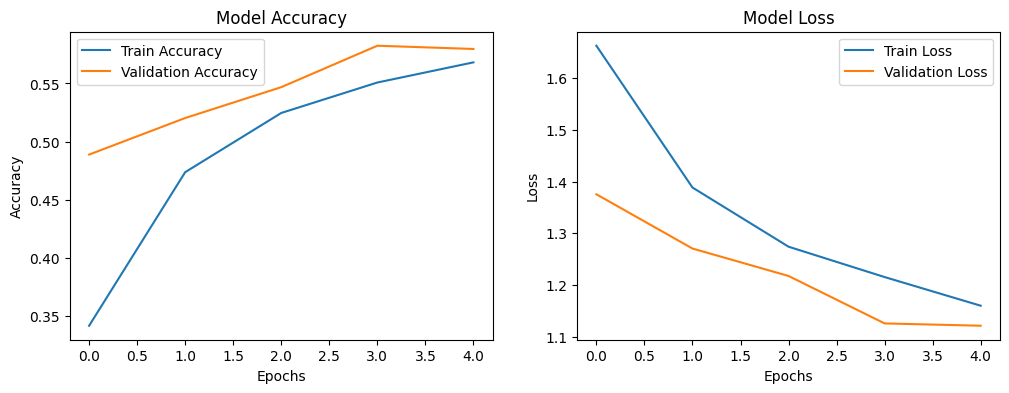

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 619ms/step
              precision    recall  f1-score   support

           0       0.16      0.12      0.14       191
           1       0.00      0.00      0.00        22
           2       0.24      0.08      0.12       204
           3       0.27      0.34      0.30       354
           4       0.21      0.20      0.21       246
           5       0.18      0.26      0.21       249
           6       0.13      0.15      0.14       166

    accuracy                           0.21      1432
   macro avg       0.17      0.16      0.16      1432
weighted avg       0.21      0.21      0.20      1432



/Users/sofiafernandes/miniconda3/envs/emoenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sofiafernandes/miniconda3/envs/emoenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sofiafernandes/miniconda3/envs/emoenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

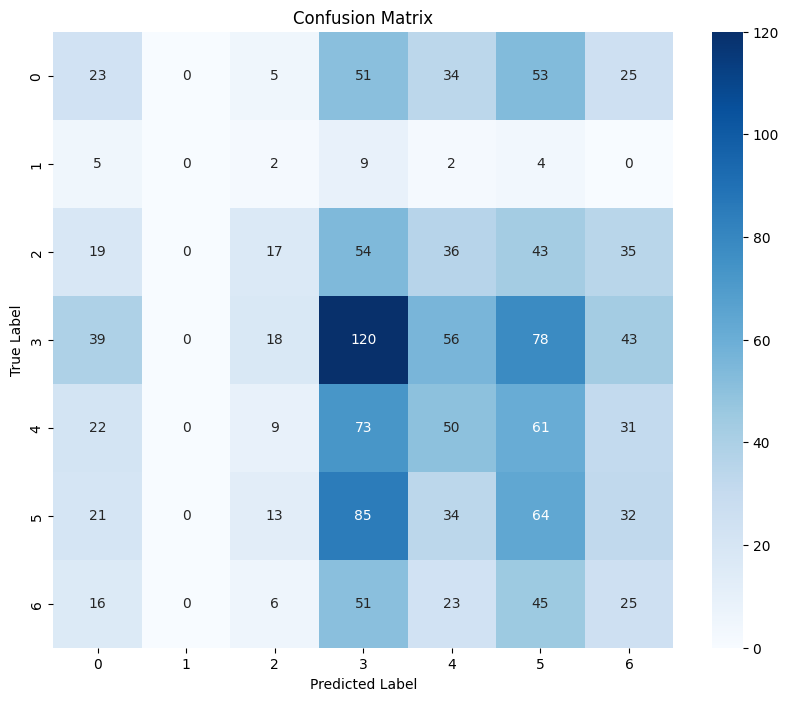

In [41]:
from tensorflow.keras.models import load_model

# Evaluate the model
loss, accuracy, auc = model.evaluate(test_data)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Load the best model
best_model = load_model('best_model.h5')
# Make predictions on the test data
predictions = best_model.predict(test_data)
# Get the true labels
true_labels = test_data.classes
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
# Print classification report
print(classification_report(true_labels, predicted_labels))
# Plot confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Save the model
model.save('fer2013_model_vgg.h5')
# Load the model
loaded_model = load_model('fer2013_model_vgg.h5')


In [ ]:
# shows folders

In [ ]:
# Tensorflow dataset from /train and /test folders

In [10]:
import tensorflow.keras.layers as layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Set the random seed for reproducibility
np.random.seed(42)
# Set the style for seaborn
sns.set(style="whitegrid")
# Set the random seed for reproducibility
tf.random.set_seed(42)


# Define the Kaggle dataset name
kaggle_dataset_name = 'deadskull7/fer2013'
data_dir = read_kaggle_fer_dataset(kaggle_dataset_name)
train_dir, test_dir = "/train", "/test"

if train_dir and test_dir:
    data_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
    )

    train_data = data_gen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        color_mode="grayscale",
        batch_size=64,
        class_mode="categorical",
        subset="training",
        shuffle=True
    )

    val_data = data_gen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        color_mode="grayscale",
        batch_size=64,
        class_mode="categorical",
        subset="validation",
        shuffle=False
    )

    # Soft CNN Model (Improved Architecture)
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(train_data.num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks for training
    checkpoint = ModelCheckpoint('best_fer_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True, verbose=1)

    # Train the model
    epochs = 100  # Increased number of epochs
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=epochs,
        callbacks=[checkpoint, early_stopping]
    )

    # Evaluate the best model
    loaded_model = tf.keras.models.load_model('best_fer_model.h5')
    eval_results = loaded_model.evaluate(val_data)
    print(f"Validation Accuracy of the Best Model: {eval_results[1] * 100:.2f}%")

    # Plotting training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy vs. Epoch')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss vs. Epoch')
    plt.show()

    print("Training completed. Best model saved as 'best_fer_model.h5'")

else:
    print("Failed to load the Kaggle dataset.")

ValueError: Unbatching a tensor is only supported for rank >= 1

In [14]:
!pip install --upgrade kagglehub
import tensorflow.keras.layers as layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import seaborn as sns
import tensorflow as tf
import kagglehub
import os

# Set the random seeds for reproducibility
np.random.seed(42)
sns.set(style="whitegrid")
tf.random.set_seed(42)

import kagglehub
import os

def read_kaggle_fer_dataset(name):
    """Downloads and extracts the FER2013 dataset from Kaggle and returns the paths to the train and test directories."""
    try:
        download_path = kagglehub.pull(name, path=".")
        train_dir_path = os.path.join(download_path, "train")
        test_dir_path = os.path.join(download_path, "test")
        if os.path.exists(train_dir_path) and os.path.exists(test_dir_path):
            return train_dir_path, test_dir_path
        else:
            print(f"Error: 'train' or 'test' subdirectories not found in the downloaded dataset at {download_path}")
            return None, None
    except Exception as e:
        print(f"Error reading Kaggle dataset '{name}': {e}")
        return None, None

# Define the Kaggle dataset name
kaggle_dataset_name = 'deadskull7/fer2013'
train_dir, test_dir = read_kaggle_fer_dataset(kaggle_dataset_name)

if train_dir and test_dir:
    data_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
    )

    train_data = data_gen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        color_mode="grayscale",
        batch_size=64,
        class_mode="categorical",
        subset="training",
        shuffle=True
    )

    val_data = data_gen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        color_mode="grayscale",
        batch_size=64,
        class_mode="categorical",
        subset="validation",
        shuffle=False
    )

    # Soft CNN Model (Improved Architecture)
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(train_data.num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks for training
    checkpoint = ModelCheckpoint('best_fer_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True, verbose=1)

    # Train the model
    epochs = 100  # Increased number of epochs
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=epochs,
        callbacks=[checkpoint, early_stopping]
    )

    # Evaluate the best model
    loaded_model = tf.keras.models.load_model('best_fer_model.h5')
    eval_results = loaded_model.evaluate(val_data)
    print(f"Validation Accuracy of the Best Model: {eval_results[1] * 100:.2f}%")

    # Plotting training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy vs. Epoch')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss vs. Epoch')
    plt.show()

    print("Training completed. Best model saved as 'best_fer_model.h5'")

else:
    print("Failed to load the Kaggle dataset.")

  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.10
    Uninstalling kagglehub-0.3.10:
      Successfully uninstalled kagglehub-0.3.10
Error reading Kaggle dataset 'deadskull7/fer2013': module 'kagglehub' has no attribute 'pull'
Failed to load the Kaggle dataset.


In [ ]:
# Main Execution
if __name__ == '__main__':
    # Load datasets
    train_dataset = FER2013Dataset('fer2013/fer2013.csv', transform=train_transform)
    val_dataset = FER2013Dataset('fer2013/fer2013.csv', transform=val_transform)  # Replace with actual val path
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
    
    # Initialize model
    model = MiniXception(num_classes=7).to(device)
    
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    
    # Train the model
    history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100)
    
    # Save final model
    torch.save(model.state_dict(), 'final_model.pth')
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['val_acc'], label='Val Accuracy')
    plt.legend()
    plt.show()

# To reuse the model:
# model = MiniXception(num_classes=7)
# model.load_state_dict(torch.load('best_model.pth'))
# model.eval()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import kagglehub
import tensorflow as tf  # Import TensorFlow for the function

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Custom Dataset Class for PyTorch
class FER2013TorchDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        pixels = self.data.iloc[idx]['pixels']
        image = np.array([int(pixel) for pixel in pixels.split()], dtype=np.uint8)
        image = image.reshape(48, 48, 1)  # Reshape to 48x48x1
        label = self.data.iloc[idx]['emotion']

        if self.transform:
            image = self.transform(image)

        return image, label

# Data Augmentation & Transformations
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

val_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Complete Mini-Xception Model
class MiniXception(nn.Module):
    def __init__(self, num_classes=7):
        super(MiniXception, self).__init__()

        self.features = nn.Sequential(
            # Entry Flow
            nn.Conv2d(1, 8, 3, padding=1, bias=False),
            nn.BatchNorm2d(8),
            nn.ReLU(inplace=True),

            # Depthwise Separable Conv Block 1
            nn.Conv2d(8, 8, 3, groups=8, padding=1, bias=False),
            nn.Conv2d(8, 16, 1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            # Depthwise Separable Conv Block 2
            nn.Conv2d(16, 16, 3, groups=16, padding=1, bias=False),
            nn.Conv2d(16, 32, 1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            # Depthwise Separable Conv Block 3
            nn.Conv2d(32, 32, 3, groups=32, padding=1, bias=False),
            nn.Conv2d(32, 64, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
        )

        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Dropout(0.2),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Modified function to read Kaggle FER dataset for PyTorch
def read_kaggle_fer_dataset(name, subfolder="", provider="pytorch"):
    """
    Read a Kaggle dataset into a pandas DataFrame for PyTorch.

    Parameters:
    - name: str, the name of the Kaggle dataset (e.g., 'deadskull7/fer2013')
    - subfolder: str, optional, the subfolder within the dataset to read from
    - provider: str, optional, the provider to use for reading the dataset (default is 'pytorch')

    Returns:
    - pandas.DataFrame: The dataset as a pandas DataFrame.
    """
    if provider == "pytorch":
        try:
            data_path = kagglehub.pull(name, path=".")
            csv_file = None
            for file in os.listdir('.'):
                if file.endswith('.csv'):
                    csv_file = file
                    break
            if csv_file:
                df = pd.read_csv(csv_file)
                return df
            else:
                raise FileNotFoundError("No CSV file found in the downloaded dataset.")
        except Exception as e:
            print(f"Error reading Kaggle dataset: {e}")
            return None
    elif provider == "tensorflow":
        raise ValueError("The 'tensorflow' provider is not directly compatible with the current PyTorch training script. Please use 'pytorch'.")
    else:
        raise ValueError("Unsupported provider. Use 'pytorch'.")

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100):
    best_acc = 0.0
    history = {'train_loss': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(epoch_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = correct / total

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_model.pth')

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {epoch_loss:.4f}, '
              f'Val Loss: {val_loss:.4f}, '
              f'Val Acc: {val_acc:.4f}')

    return history

# --- Main Execution ---
if __name__ == "__main__":
    # Specify the Kaggle dataset name
    kaggle_dataset_name = 'deadskull7/fer2013'

    # Read the dataset using the modified function
    fer_data_df = read_kaggle_fer_dataset(kaggle_dataset_name, provider="pytorch")

    if fer_data_df is not None:
        # Create PyTorch Datasets
        full_dataset = FER2013TorchDataset(fer_data_df, transform=train_transform)

        # Split the dataset into training and validation sets
        train_size = int(0.8 * len(full_dataset))
        val_size = len(full_dataset) - train_size
        train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

        # Create DataLoaders
        train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
        val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4)

        # Initialize the model
        model = MiniXception(num_classes=7).to(device)

        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Train the model
        history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100)

        # Plotting training history (optional)
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history['train_loss'], label='Train Loss')
        plt.plot(history['val_loss'], label='Validation Loss')
        plt.legend()
        plt.title('Loss vs. Epoch')

        plt.subplot(1, 2, 2)
        plt.plot(history['val_acc'], label='Validation Accuracy')
        plt.legend()
        plt.title('Accuracy vs. Epoch')
        plt.show()

        print("Training completed. Best model saved as 'best_model.pth'")
    else:
        print("Failed to load the Kaggle dataset.")

Error reading Kaggle dataset: module 'kagglehub' has no attribute 'pull'
Failed to load the Kaggle dataset.
